In [2]:
import numpy as np

In [3]:
maze = ((0,   0,  'D', 0,  0,  0),
        (0,  'A',  0,  0, 'G', 0),
        ('E', 0,  'B', 0, 'I', 0),
        (0,  'C',  0,  0,  0,  0),
        (0,   0,  'F', 0,  0, 'H'),
        (0,   0,   0, 'J', 0,  0))

item = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J')


In [4]:

def item_gen():
    #fix result
    #np.random.seed(5)

    #amount of item should be 1~10
    amt_item = np.random.randint(1, 11)
    #amt_item = 1

    order = []

    #random generate order
    for _ in range(amt_item):
        while True:
            #random generate item
            rand_it = np.random.randint(0, 10)
            if item[rand_it] in order:
                rand_it = np.random.randint(0, 10)
            else:
                break
        order.append(item[rand_it])
    
    #print(order)
    return order

In [5]:

def detect(x, y, s):    
    if x >= 0 and y >= 0 and x<=5 and y<=5: #make sure inside the wall
        roll = np.random.uniform(0, 1)

        if maze[x][y] in order:
            if (roll > .1): # sensor detects item
                s['item'].append((x, y))
            else: # sensor fails to detect item
                s['empty'].append((x, y))
        else:
            if (roll > .1): #sensor detects it doesn't contain item
                s['empty'].append((x, y))
            else: # sensor fails
                s['item'].append((x, y))

def move(p, s):
    if s['item']:
        target = s['item'][np.random.randint(0, len(s['item']))]
    else:
        target = s['empty'][np.random.randint(0, len(s['empty']))]
    #print(target)
    return target
    

In [6]:
#initialize p position
order = item_gen()
#print(order)
p = [0, 0]
success = False
episode = 0
score = 0
long_path = []
short_path = []
step = 0
record=[]

while True:
    sensor = {'item':[], 'empty':[]}
    
    step+=1
    
    detect(p[0]-1, p[1],   sensor) #up
    detect(p[0]+1, p[1],   sensor) #down
    detect(p[0]  , p[1]-1, sensor) #left
    detect(p[0]  , p[1]+1, sensor) #right
    
    x, y = move(p, sensor)
    p = [x, y]
    
    if maze[p[0]][p[1]] in order:
        order.remove(maze[p[0]][p[1]])
        score +=3
    else:
        score -=1
        
    if not order:
        #print('score', score)
        print('.', end='')
        
        #initialize
        record.append(score)
        sensor = {'item':[], 'empty':[]}
        order = item_gen()
        score = 0
        step = 0
        episode +=1
        
        if episode == 1000:
            break
        #else:
        #    print(order)

print("\navg score", sum(record) / len(record))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [7]:
print(len(record))


1000


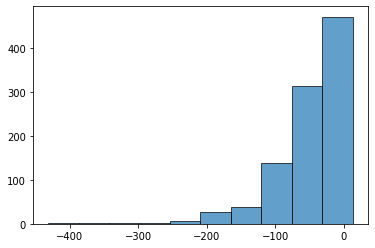

In [11]:
import matplotlib.pyplot as plt
import math

bins = int(math.log2(len(record))+1)

plt.hist(record, bins=bins, edgecolor='black', alpha=.7)
plt.show()